In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [52]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [72]:
train = pd.read_csv("train.csv").replace("male", 0 ).replace("female", 1).replace("S", 0 ).replace("C", 1).replace("Q", 2)
test = pd.read_csv("test.csv").replace("male", 0).replace("female", 1).replace("S", 0).replace("C", 1).replace("Q", 2)

In [73]:
train["Age"].fillna(train.Age.mean(), inplace=True)
train["Embarked"].fillna(train.Embarked.mean(), inplace=True)

In [74]:
combine1 = [train]

for train in combine1: 
        train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for train in combine1: 
        train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
        del train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for train in combine1: 
        train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
        train['Salutation'] = train['Salutation'].fillna(0)

In [75]:
for train in combine1: 
        train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
        train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
        train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
        del train['Ticket'] 
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)

In [76]:
for train in combine1: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
del train['Cabin'] 
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

In [77]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,0,3,0,22.000000,1,0,7.2500,0.0,1.0,3,9,0
1,2,1,1,1,38.000000,1,0,71.2833,1.0,3.0,0,8,1
2,3,1,3,1,26.000000,0,0,7.9250,0.0,2.0,3,16,0
3,4,1,1,1,35.000000,1,0,53.1000,0.0,3.0,1,6,1
4,5,0,3,0,35.000000,0,0,8.0500,0.0,1.0,3,6,0
5,6,0,3,0,29.699118,0,0,8.4583,2.0,1.0,3,6,0
6,7,0,1,0,54.000000,0,0,51.8625,0.0,1.0,1,5,2
7,8,0,3,0,2.000000,3,1,21.0750,0.0,4.0,3,6,0
8,9,1,3,1,27.000000,0,2,11.1333,0.0,3.0,3,6,0
9,10,1,2,1,14.000000,1,0,30.0708,1.0,3.0,2,6,0


In [78]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for train in combine1:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

In [81]:
train_data = train.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [83]:
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 

test["FamilySize"] = train["SibSp"] + train["Parch"] + 1

for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    
test_data = test.values
xs_test = test_data[:, 1:]

In [89]:
xs_test.shape

(418, 13)

In [91]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(xs, y)
Y_pred = random_forest.predict(xs_test)

import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

"""
parameters = {
        'n_estimators'      : [10,25,50,75,100],
        'random_state'      : [0],
        'n_jobs'            : [4],
        'min_samples_split' : [5,10, 15, 20,25, 30],
        'max_depth'         : [5, 10, 15,20,25,30]
}

clf = grid_search.GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(xs, y)
 
print(clf.best_estimator_)
"""

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


"\nparameters = {\n        'n_estimators'      : [10,25,50,75,100],\n        'random_state'      : [0],\n        'n_jobs'            : [4],\n        'min_samples_split' : [5,10, 15, 20,25, 30],\n        'max_depth'         : [5, 10, 15,20,25,30]\n}\n\nclf = grid_search.GridSearchCV(RandomForestClassifier(), parameters)\nclf.fit(xs, y)\n \nprint(clf.best_estimator_)\n"

In [93]:
random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq

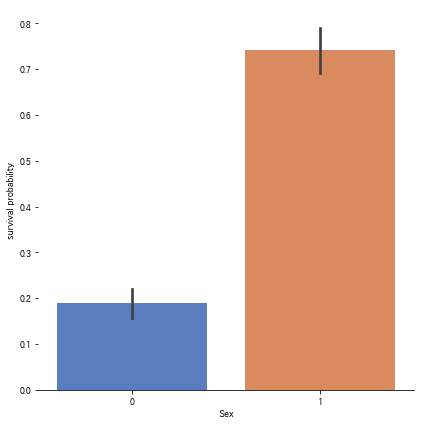

In [94]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.factorplot(x="Sex", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

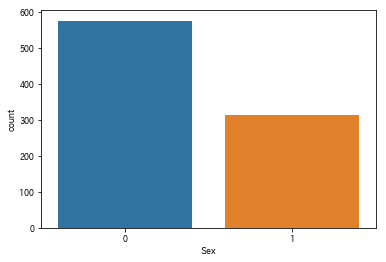

In [95]:
sns.countplot(x='Sex', data = train)

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


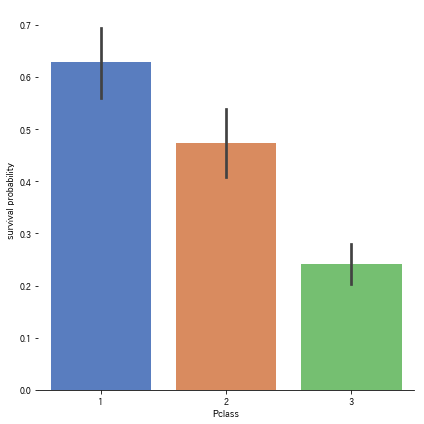

In [96]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


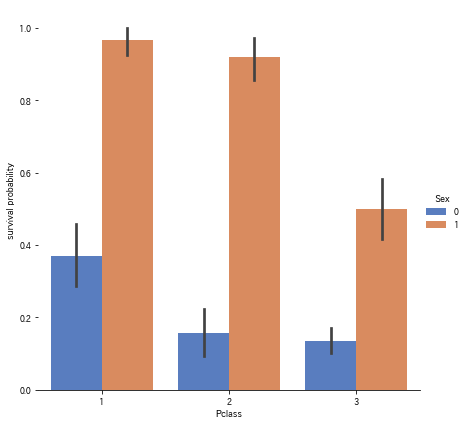

In [97]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


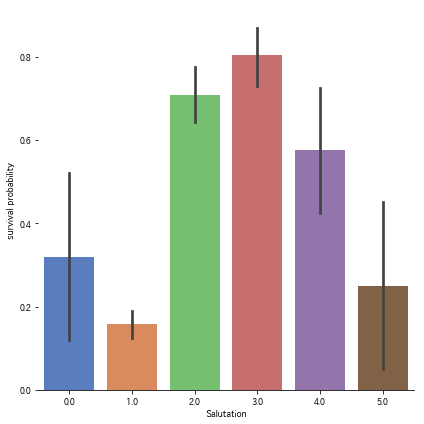

In [98]:
g = sns.factorplot(x="Salutation", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

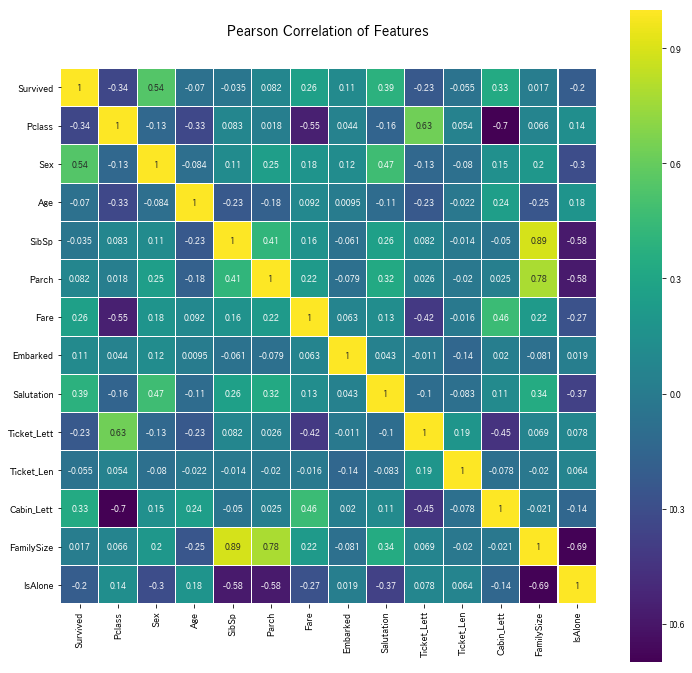

In [99]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
del train['PassengerId']
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

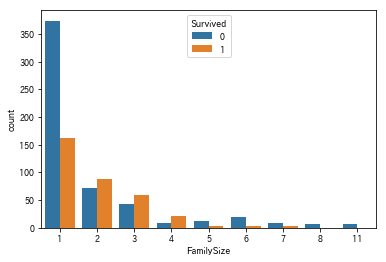

In [100]:
sns.countplot(x='FamilySize', data = train, hue = 'Survived')


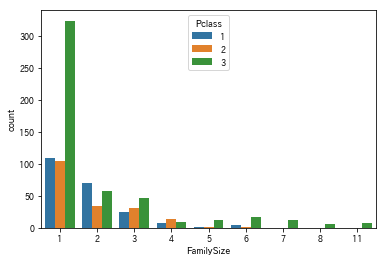

In [101]:
sns.countplot(x='FamilySize', data = train,hue = 'Pclass')


/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


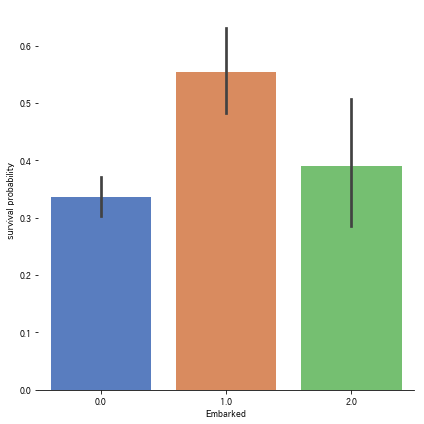

In [102]:
t=pd.read_csv("train.csv").replace("S",0).replace("C",1).replace("Q",2)
train['Embarked']= t['Embarked']
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

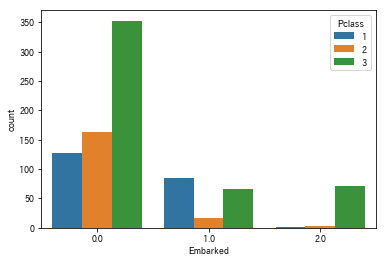

In [103]:
sns.countplot(x='Embarked', data = train,hue = 'Pclass')


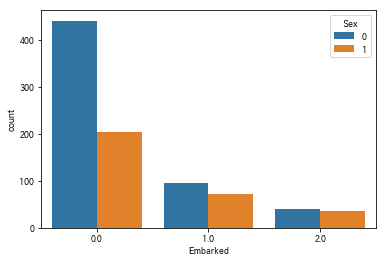

In [104]:
sns.countplot(x='Embarked', data = train,hue = 'Sex')


/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

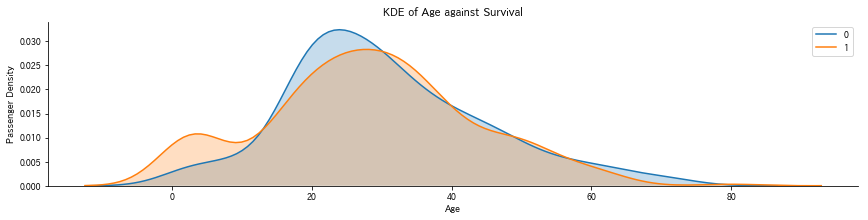

In [105]:
plt.figure()
sns.FacetGrid(data=t, hue="Survived", aspect=4).map(sns.kdeplot, "Age", shade=True)
plt.ylabel('Passenger Density')
plt.title('KDE of Age against Survival')
plt.legend()

/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eskey/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


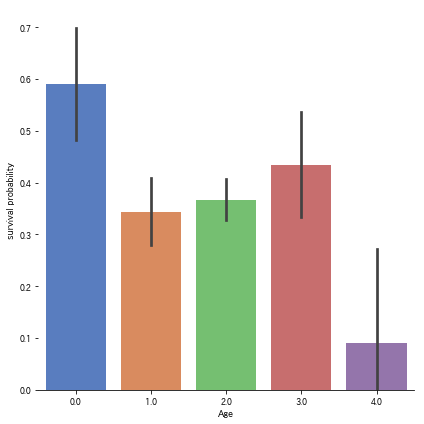

In [106]:
for t in combine1: 
    t.loc[ t['Age'] <= 15, 'Age']                                                = 0
    t.loc[(t['Age'] > 15) & (t['Age'] <= 25), 'Age'] = 1
    t.loc[(t['Age'] > 25) & (t['Age'] <= 48), 'Age'] = 2
    t.loc[(t['Age'] > 48) & (t['Age'] <= 64), 'Age'] = 3
    t.loc[ t['Age'] > 64, 'Age'] =4
g = sns.factorplot(x="Age", y="Survived",  data=t,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

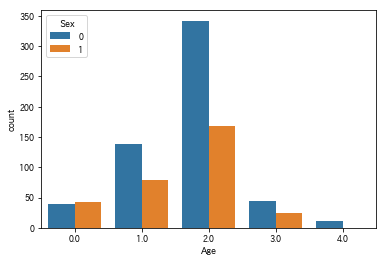

In [107]:
sns.countplot(x='Age', data = t,hue = 'Sex')


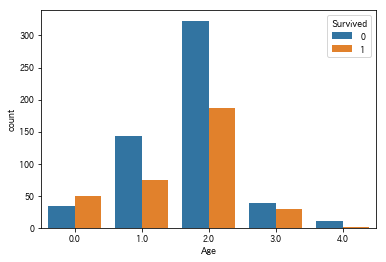

In [108]:
sns.countplot(x='Age', data = t,hue = 'Survived')
